In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

In [2]:
data=pd.read_csv('Dix.csv', index_col="date", parse_dates=True)

In [3]:
df=data.copy()

In [4]:
df

,price,dix,gex
date,,,
2011-05-02,1361.219971,0.378842,1.897313e+09
2011-05-03,1356.619995,0.383411,1.859731e+09
2011-05-04,1347.319946,0.392122,1.717764e+09
2011-05-05,1335.099976,0.405457,1.361864e+09
2011-05-06,1340.199951,0.418649,1.490329e+09
...,...,...,...
2021-12-20,4568.020020,0.416639,3.312342e+08
2021-12-21,4649.229980,0.446712,4.927778e+09
2021-12-22,4696.560059,0.435221,1.479469e+10


In [5]:
#la target représente la performance du s&p500 sur n séances
#valeur d'arrivée - valeur de départ /valeur de départ * 100
def target(n : int):
    data=[]
    for i in range(len(df)):
        try:
            data.append(((df["price"][i+n]-df["price"][i])/df["price"][i])*100)
        except IndexError:
            data.append(np.mean(data))
    df["target"]=data
    return

target(10)

<AxesSubplot:ylabel='Frequency'>

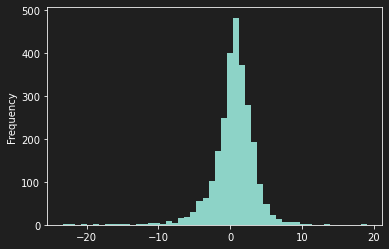

In [6]:
df['target'].plot.hist(bins=50)

In [7]:
#Suit une distribution binomiale centrée en 0

In [7]:
df.shape

(2683, 4)

In [8]:
df.isna().value_counts()

price  dix    gex    target
False  False  False  False     2683
dtype: int64

In [10]:
#aucune valeure manquante dans le dataset

<AxesSubplot:ylabel='None'>

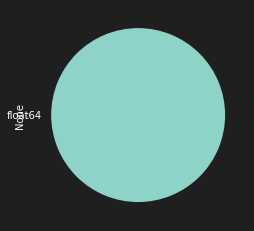

In [9]:
df.dtypes.value_counts().plot.pie()
#tout est en float 64

In [12]:
#analyse de la target cf ci-dessus
#analyse de la relation feature/target

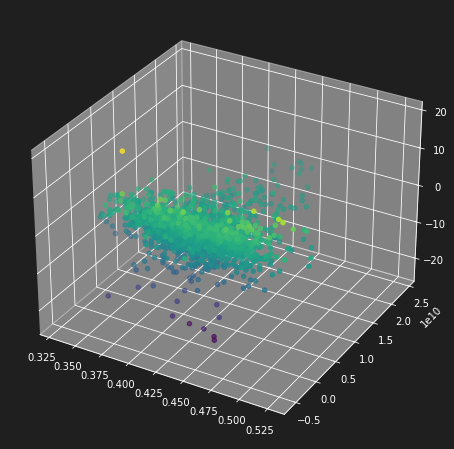

In [10]:
#%matplotlib
plt.figure(figsize=(12,8))
ax=plt.axes(projection='3d')
ax.scatter(df['dix'],df['gex'],df['target'], c=df['target'])

In [14]:
#volatilité plus importante lorsque le gamma exposure est faible
#implication du dark pool index difficilement exploitable à première vue

<AxesSubplot:ylabel='Frequency'>

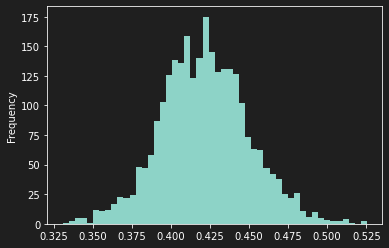

In [11]:
#DIX
df['dix'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

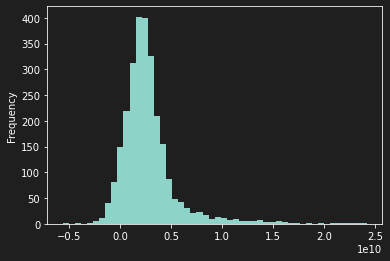

In [12]:
df['gex'].plot.hist(bins=50)

In [17]:
df.describe()

,price,dix,gex,target
count,2683.000000,2683.000000,2.683000e+03,2683.000000
mean,2391.039544,0.421516,2.766393e+09,0.511314
std,848.812888,0.028125,2.789947e+09,2.951861
min,1099.229980,0.330555,-5.626982e+09,-23.376101
25%,1804.924988,0.402519,1.281703e+09,-0.649835
50%,2157.030029,0.420953,2.256852e+09,0.708666
75%,2858.995000,0.439760,3.471239e+09,2.099634
max,4791.189941,0.525397,2.421867e+10,19.052472


In [18]:
#les deux features suivent une distribution binomiale
#étant donné l'écart type et la variance => Noramlisation et Standardisation
#outliers j'ai choisi de ne pas les retirer car je pense qu'il faut envisager toutes les hypothèses de scénarios sur les marchés

100%|██████████| 4/4 [00:00<00:00, 104.25it/s]


True

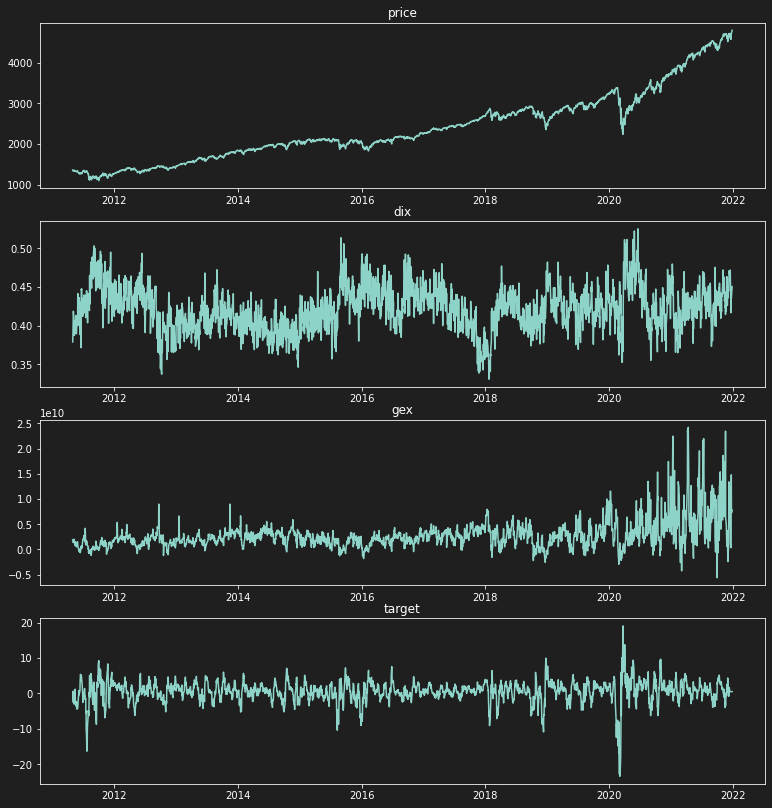

In [13]:
import tqdm

def graph_sublpot_pandas(data):
    dataset=data.copy()
    n=0
    for i in dataset.columns:
        if dataset[i].dtypes=='float64':
            n+=1
        elif dataset[i].dtypes =='int64':
            n+=1
        else :
            dataset.drop(i,axis=1, inplace=True)
    plt.figure(figsize=(13,3.5*n))
    plt.subplot(n,1,1)
    title=dataset.columns
    for i, k in zip(tqdm.tqdm(range(1,n+1)),range(0,n)):
        plt.subplot(n,1,i)
        plt.plot(dataset.iloc[:,k])
        plt.title(label=title[k])
    return True

graph_sublpot_pandas(df)

In [14]:
#export
from pathlib import Path
df.to_csv(Path.cwd()/'dataframe_1.csv')